In [170]:
# total_bill: Total bill in dollars including taxes
# tip: Tip given to waiters in dollars
# sex: gender of the person paying the bill
# smoker: whether the person smoked or not
# day: day of the week
# time: lunch or dinner
# size: number of people in a table 

# Target variable -> tip
# Feature variables -> total_bill,sex,smoker,day,time,size

In [171]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')

In [172]:
# Data collection and Processing

#loading the data from .csv file
df=pd.read_csv('E:\\python program\\jupyter1\\tips.csv')

In [173]:
# Inspecting the first 5 rows of the dataframe
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [174]:
# checking the number of rows and columns
df.shape

(244, 7)

In [175]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [176]:
# Checking the number of missing value
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [177]:
# checking the distribution of categorical data
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.day.value_counts())
print(df.time.value_counts())


Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [178]:
# Discription of the data in dataframe
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [179]:
# find unique values in column
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [180]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [181]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [182]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [183]:
# Encoding the Categorical data
# sex column
df.replace({'sex':{'Female':0,'Male':1}},inplace=True)
# Smoker column
df.replace({'smoker':{'No':0,'Yes':1}},inplace=True)
# Day column
df.replace({'day':{'Sun':0,'Sat':1,'Thur':2,'Fri':3}},inplace=True)
# Time column
df.replace({'time':{'Dinner':0,'Lunch':1}},inplace=True)

In [184]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


In [185]:
final_df=df
final_df=final_df.fillna(value=0)

In [186]:
final_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [187]:
final_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


In [188]:
# Data Visualization
# Find Skewness of target variable
final_df['tip'].skew()

1.4654510370979401

In [189]:
def right_nor_left(final_df, col):
    
    rs = df[value].skew()

    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"

In [190]:
cols=final_df.columns.tolist()

In [191]:
cols = ['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'size']

for value in cols:
    
    print(value, "->",right_nor_left(final_df,value))

total_bill -> positive (+ve) skewed
tip -> positive (+ve) skewed
sex -> negative (-ve) skewed
smoker -> positive (+ve) skewed
day -> positive (+ve) skewed
time -> positive (+ve) skewed
size -> positive (+ve) skewed


total_bill,tip,smoker,day,time and size are positive skewed

sex is negetive skewed

In [192]:
# Find Correlation between Target variable and Feature Variable
corr_methods= {'pearson', 'kendall', 'spearman'} 

In [193]:
for value in corr_methods:
    print(value, "------------------------------------------------------------------------------\n")
    
    print(df.corr(method=value))

kendall ------------------------------------------------------------------------------

            total_bill       tip       sex    smoker       day      time  \
total_bill    1.000000  0.517181  0.120889  0.050004 -0.153125 -0.170303   
tip           0.517181  1.000000  0.046539  0.014119 -0.134164 -0.116622   
sex           0.120889  0.046539  1.000000  0.002816 -0.204860 -0.205231   
smoker        0.050004  0.014119  0.002816  1.000000  0.141003 -0.054921   
day          -0.153125 -0.134164 -0.204860  0.141003  1.000000  0.653536   
time         -0.170303 -0.116622 -0.205231 -0.054921  0.653536  1.000000   
size          0.484342  0.378185  0.090987 -0.122854 -0.227723 -0.156301   

                size  
total_bill  0.484342  
tip         0.378185  
sex         0.090987  
smoker     -0.122854  
day        -0.227723  
time       -0.156301  
size        1.000000  
pearson ------------------------------------------------------------------------------

            total_bill       ti

In [194]:
corr=final_df.corr()

In [195]:
corr

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.175312,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.138947,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.215374,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,0.170818,-0.054921,-0.133178
day,-0.175312,-0.138947,-0.215374,0.170818,1.000000,0.670470,-0.211750
time,-0.183118,-0.121629,-0.205231,-0.054921,0.670470,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,-0.211750,-0.103411,1.000000


In [196]:
df.corr()['tip']

total_bill    0.675734
tip           1.000000
sex           0.088862
smoker        0.005929
day          -0.138947
time         -0.121629
size          0.489299
Name: tip, dtype: float64

<AxesSubplot: >

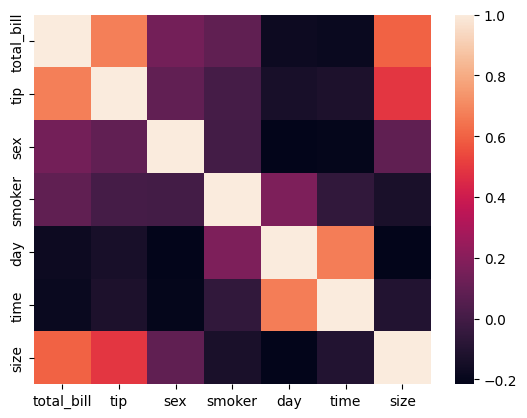

In [197]:
#correlation plot
import seaborn as sns
corr = final_df.corr()
sns.heatmap(corr)

In [198]:
final_df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.098361,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.933244,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,2.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [199]:
final_df.std()

total_bill    8.902412
tip           1.383638
sex           0.479967
smoker        0.486667
day           0.933244
time          0.449276
size          0.951100
dtype: float64

In [200]:
final_df.var()

total_bill    79.252939
tip            1.914455
sex            0.230368
smoker         0.236845
day            0.870944
time           0.201848
size           0.904591
dtype: float64

Data visualization

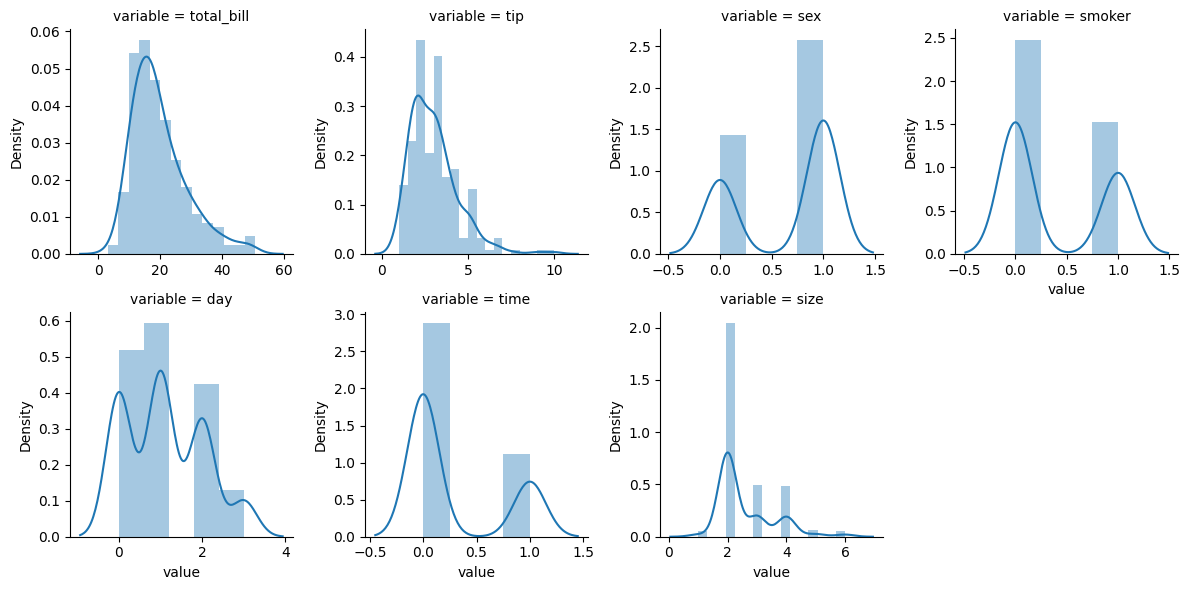

In [201]:
# Univariate distribution of data by distplot
num = [f for f in final_df.columns if final_df.dtypes[f] != 'object']
nd = pd.melt(final_df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [202]:
cols = final_df.columns.tolist()

<AxesSubplot: xlabel='tip', ylabel='Density'>

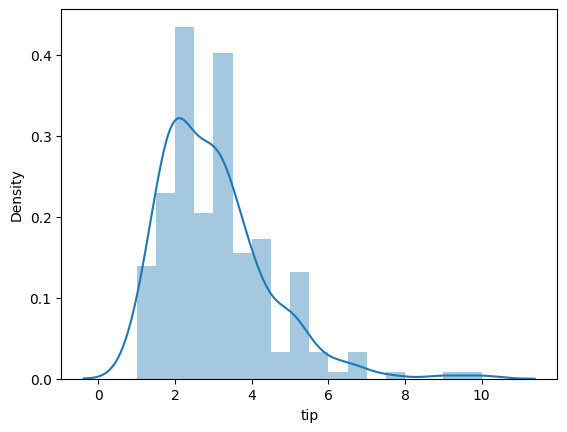

In [203]:
sns.distplot(final_df['tip'])

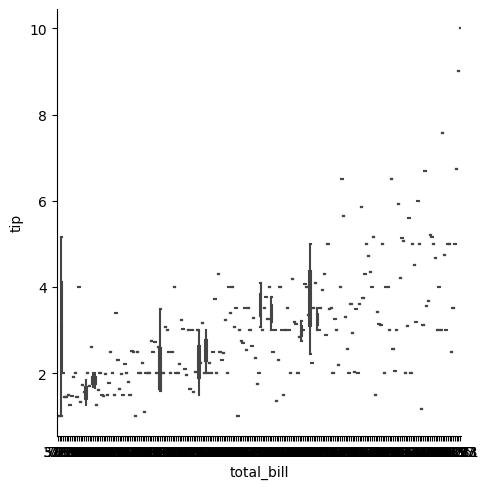

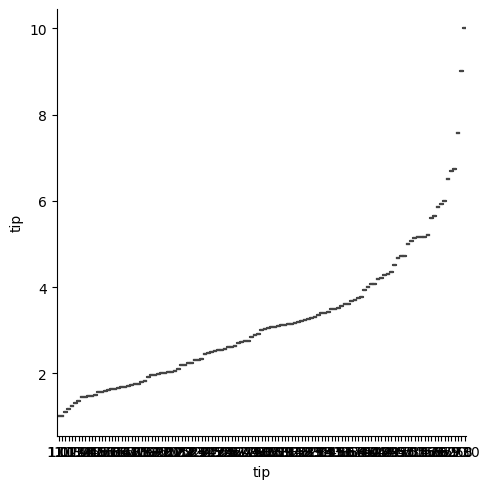

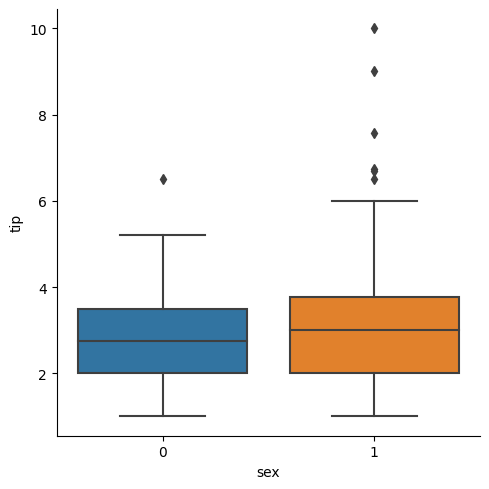

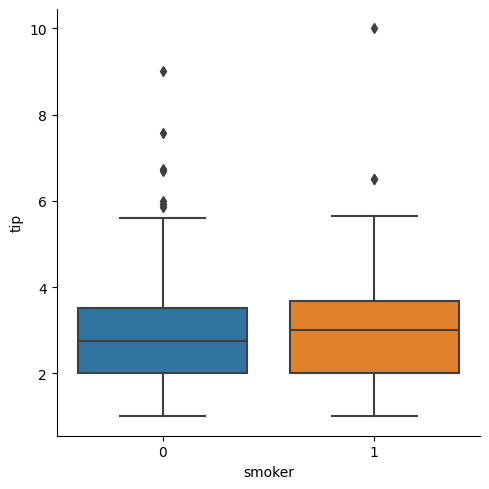

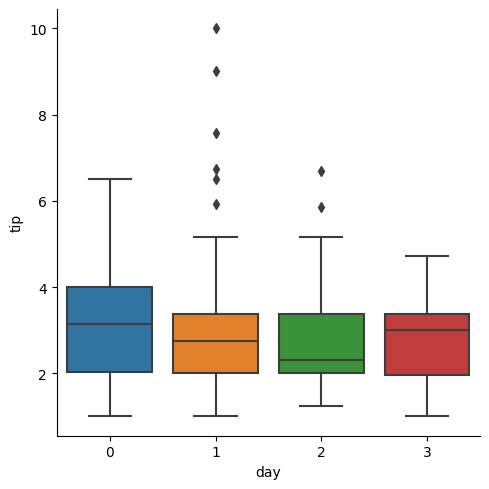

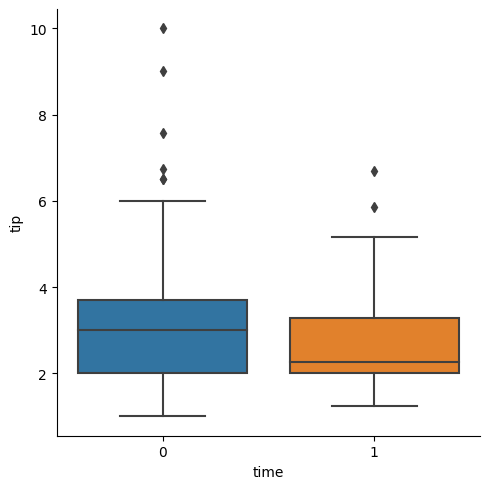

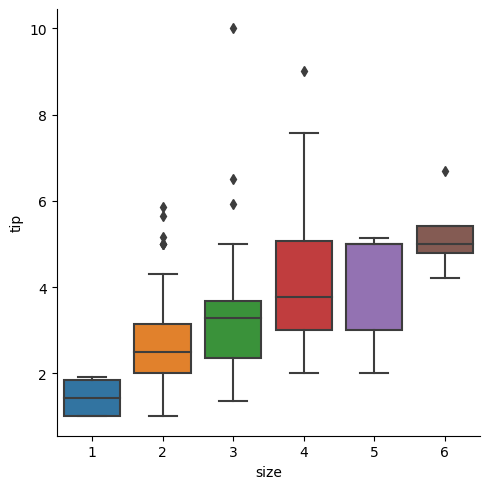

In [204]:
# Detecting outliers using Boxplot
for value in cols:
    sns.catplot(data=final_df, x=value, y="tip", kind="box")


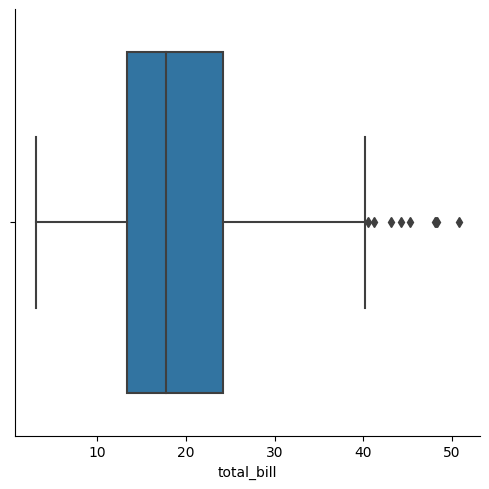

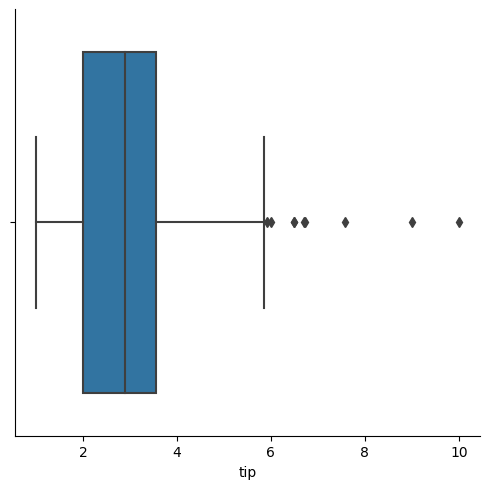

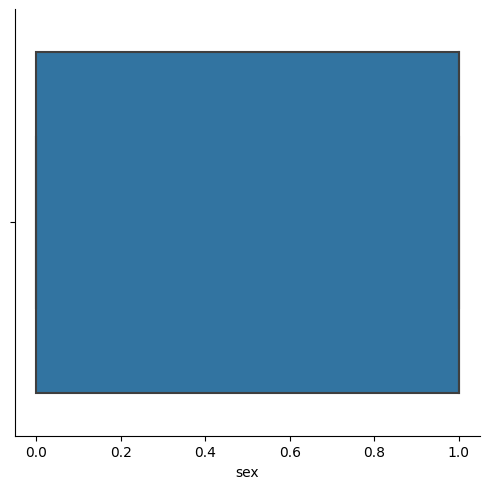

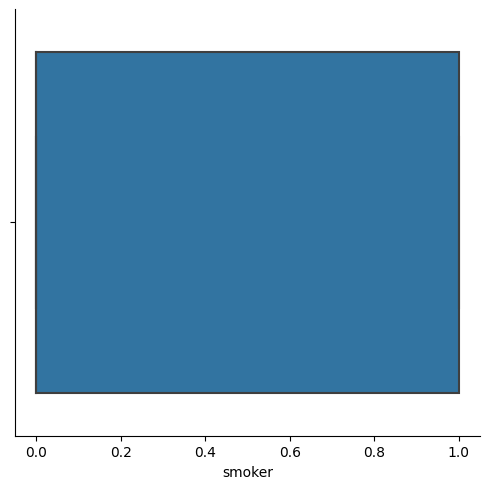

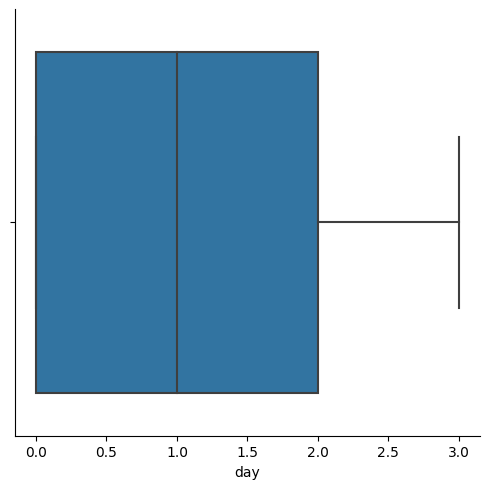

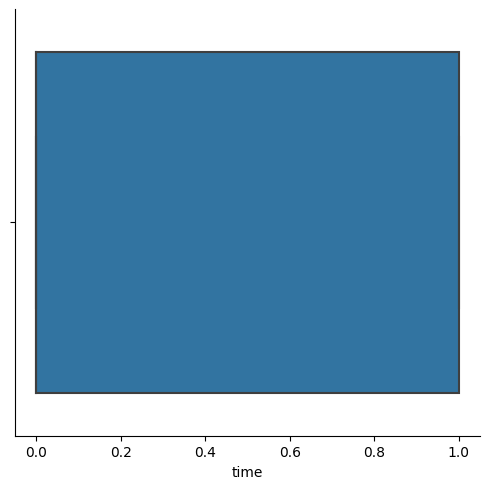

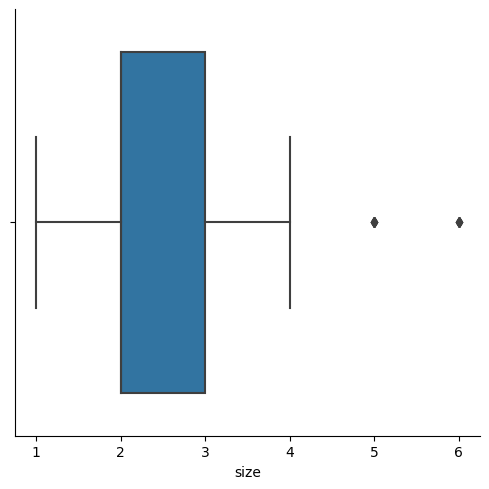

In [205]:
for value in cols:
    sns.catplot(data=final_df, x=value, kind="box")


Outliers present in Total_bills,tip and size

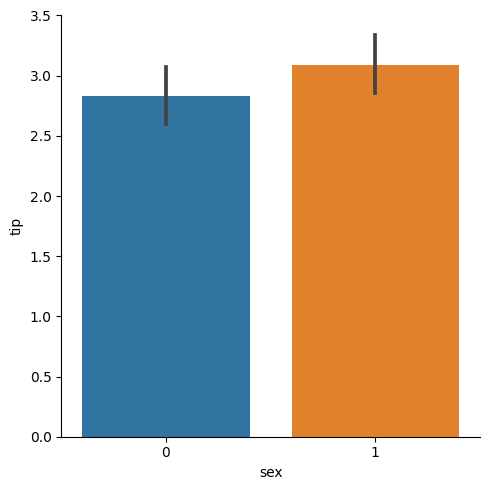

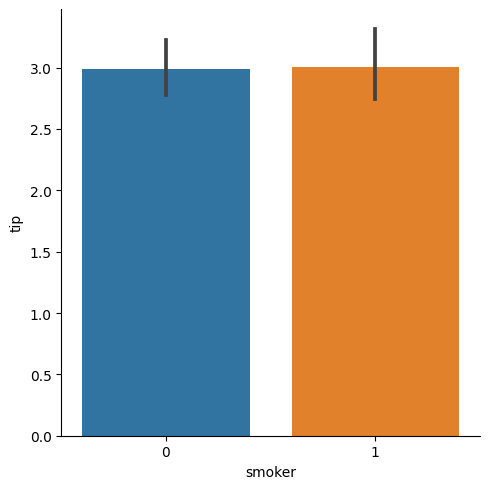

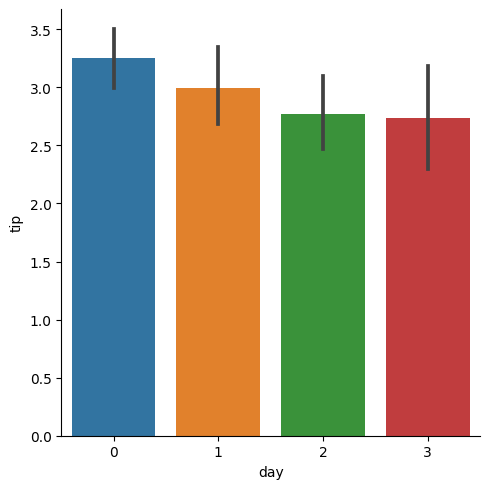

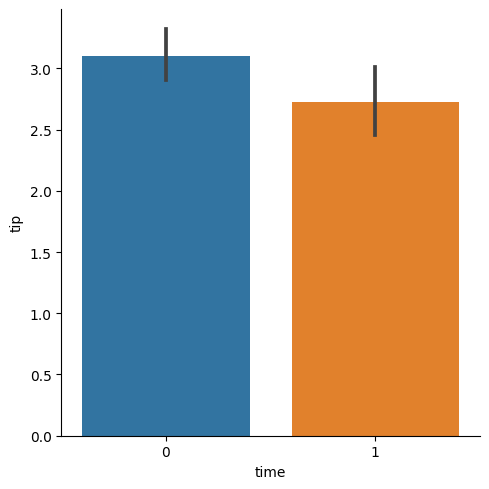

In [206]:
# Bar graph visualization of categorical variable
cat_cols = ['sex', 'smoker','day','time']
for value in cat_cols:
    sns.catplot(data=final_df, x=value, y='tip', kind="bar")


<AxesSubplot: >

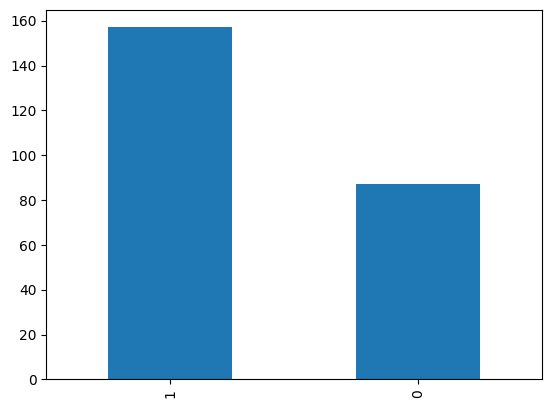

In [207]:
final_df['sex'].value_counts().plot(kind='bar')

<AxesSubplot: >

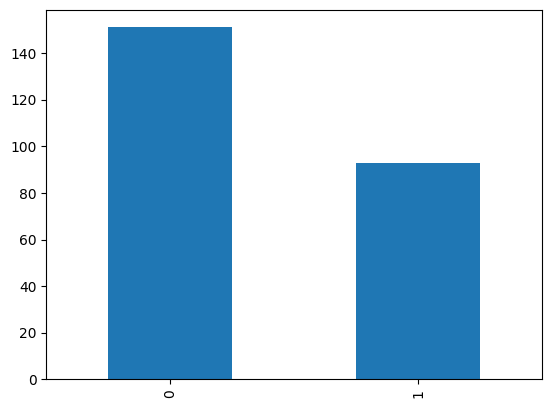

In [208]:
final_df['smoker'].value_counts().plot(kind='bar')

<AxesSubplot: >

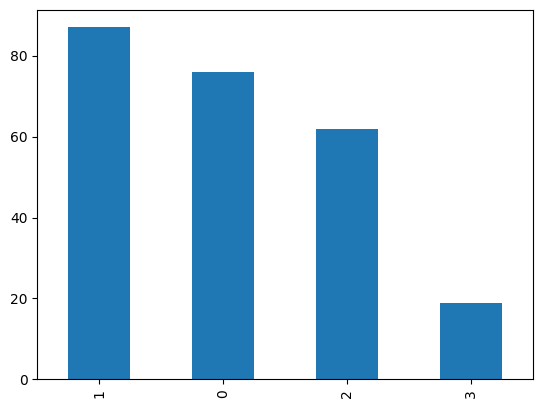

In [209]:
final_df['day'].value_counts().plot(kind='bar')

<AxesSubplot: >

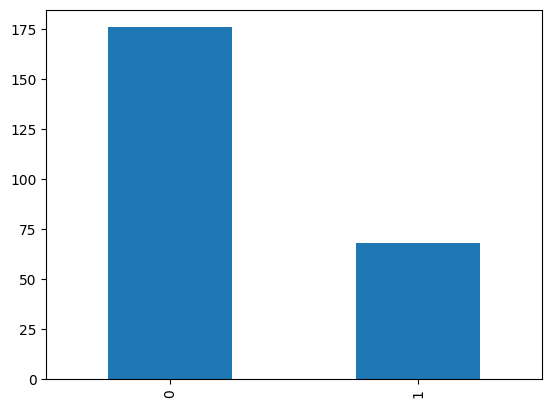

In [210]:
final_df['time'].value_counts().plot(kind='bar')

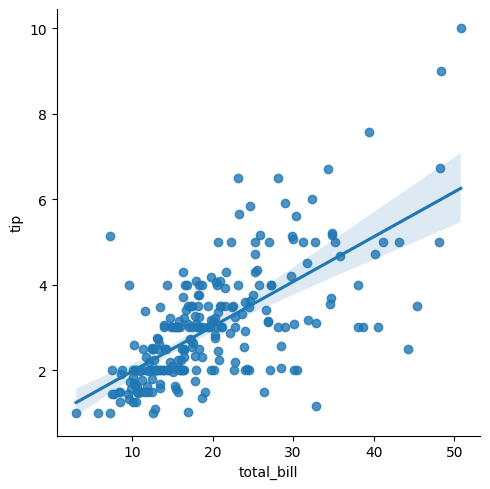

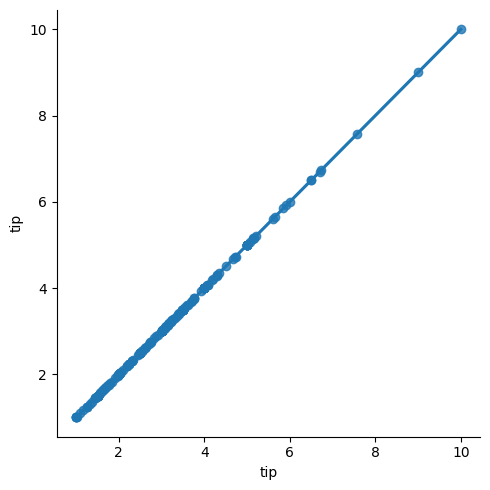

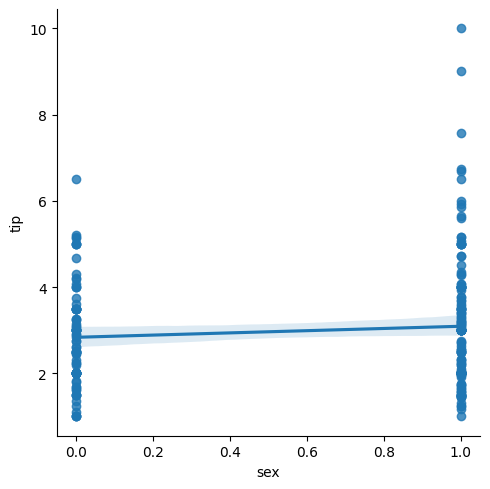

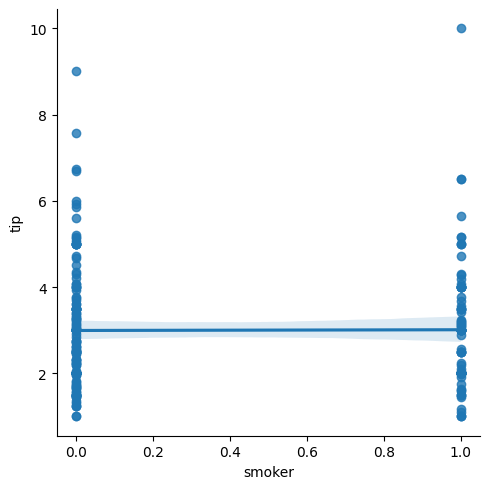

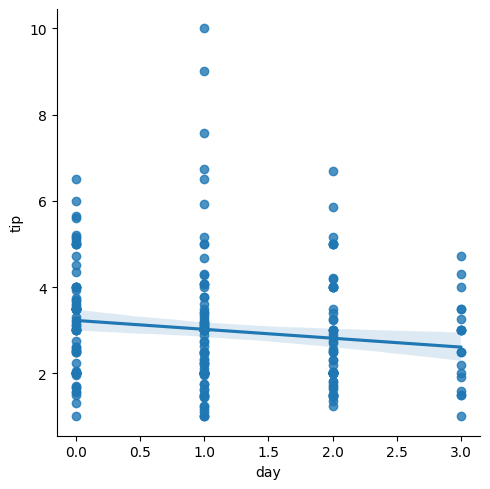

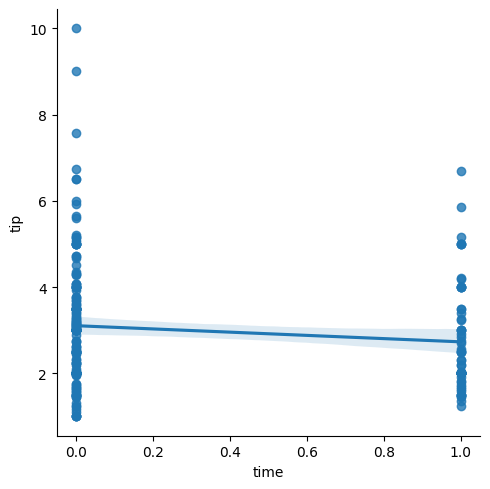

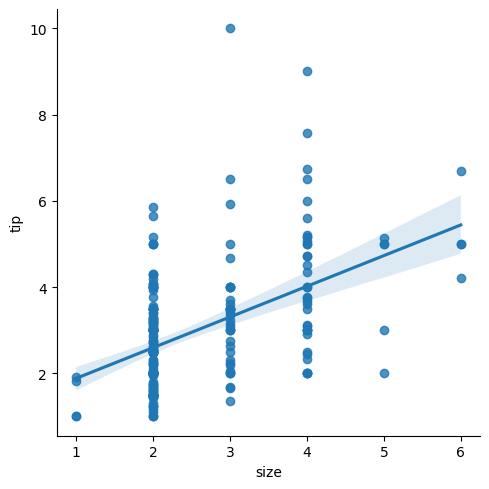

In [211]:
# Basic lmplot Visualization
for value in cols:
    sns.lmplot(x=value, y="tip", data=final_df);

skewness treatment on target variable

<AxesSubplot: xlabel='tip', ylabel='Density'>

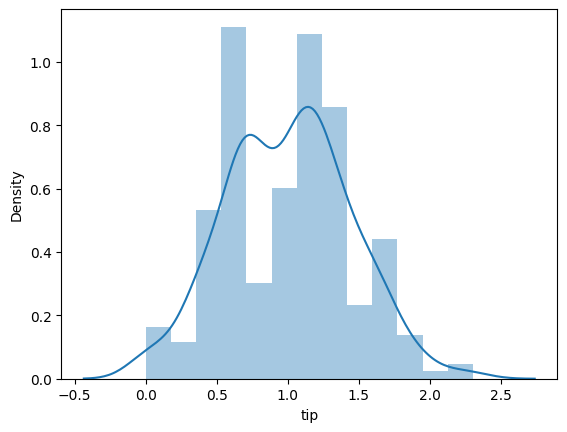

In [212]:
import numpy as np
sns.distplot(np.log(final_df['tip']))

Outlier Treatement

In [213]:
# first check number of raws and columns before outlier treatement
final_df.shape

(244, 7)

In [214]:
from scipy import stats
z=np.abs(stats.zscore(final_df.total_bill))
print(z)

0      0.314711
1      1.063235
2      0.137780
3      0.438315
4      0.540745
         ...   
239    1.040511
240    0.832275
241    0.324630
242    0.221287
243    0.113229
Name: total_bill, Length: 244, dtype: float64


In [215]:
cccccccccc

(array([ 59, 156, 170, 212], dtype=int64),)


In [216]:
final_df1=final_df[(z< 3)]
print(final_df1)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    0     0     2
1         10.34  1.66    1       0    0     0     3
2         21.01  3.50    1       0    0     0     3
3         23.68  3.31    1       0    0     0     2
4         24.59  3.61    0       0    0     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    2     0     2

[240 rows x 7 columns]


In [217]:
# check number of raws and columns after outlier treatement
final_df1.shape

(240, 7)

In [218]:
z=np.abs(stats.zscore(final_df.tip))
print(z)

0      1.439947
1      0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240    0.722971
241    0.722971
242    0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64


In [219]:
threshold=3
print(np.where(z>3))

(array([ 23, 170, 212], dtype=int64),)


In [220]:
final_df1=final_df[(z< 3)]
print(final_df1)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    0     0     2
1         10.34  1.66    1       0    0     0     3
2         21.01  3.50    1       0    0     0     3
3         23.68  3.31    1       0    0     0     2
4         24.59  3.61    0       0    0     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    2     0     2

[241 rows x 7 columns]


In [221]:
Q1=final_df['size'].quantile(0.25)
Q3=final_df['size'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.0
3.0
1.0
0.5 4.5


In [222]:
final_df1= final_df[final_df['size']< Upper_Whisker]

In [223]:
# check number of raws and columns after complete outlier treatement
final_df1.shape

(235, 7)

In [224]:
# import all important libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [225]:
# Spearate target and feature column in X and y variable
X = final_df1.drop(['tip'],axis=1)
y = final_df1['tip']

In [226]:
# Check the shape of X and y variable
X.shape, y.shape

((235, 6), (235,))

In [227]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [228]:
# Again check the shape of X and y variable
X.shape, y.shape

((235, 6), (235, 1))

Split dataset into train and test dataset

In [229]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((188, 6), (47, 6), (188, 1), (47, 1))

Model Training

Linear Regression 

In [231]:
# define linear regression model object
regression = LinearRegression()

In [232]:
# train or fit train dataset on linear regression model
regression = regression.fit(X_train, y_train)

Predict

In [233]:
prediction = regression.predict(X_test)

In [234]:
prediction,y_test

(array([[2.44806252],
        [2.25439198],
        [2.94852741],
        [2.47298491],
        [2.10037296],
        [2.36957348],
        [3.31084042],
        [2.44353015],
        [2.16891163],
        [3.02847017],
        [2.49054081],
        [2.85774014],
        [3.90376066],
        [2.00063228],
        [2.24295552],
        [2.33819804],
        [3.12752929],
        [4.59567094],
        [2.04311056],
        [2.83957839],
        [1.85418343],
        [2.10456748],
        [4.85341779],
        [1.99097728],
        [3.62356164],
        [3.11568153],
        [2.25646656],
        [2.79041956],
        [2.49744913],
        [2.85072612],
        [2.41498571],
        [2.5429797 ],
        [2.75971333],
        [2.59785902],
        [1.88804913],
        [2.72844598],
        [5.59267805],
        [2.30831111],
        [2.78864248],
        [3.60006199],
        [4.29627787],
        [5.60883007],
        [2.19023087],
        [2.87938049],
        [4.82602385],
        [3

In [235]:
r2_score(y_test,prediction)

0.49067038675320485

In [236]:
mean_squared_error(y_test,prediction)

1.6433463942844688